In [1]:
#Importing packages needed
%matplotlib inline
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import norm
from scipy.stats import chi2
from scipy.interpolate import griddata
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime, timedelta
from numpy import absolute, sqrt, log
from textwrap import wrap
from IPython.display import Math, display
import itertools
import sys

sn.set()

In [2]:
#Defining a function to read minute data
def readMinuteData(filename):
    first, last, number = 0,0,0
    temp = []
    with open(filename, 'r') as file:
        #The map function changes type into a float
        first, last, number = map(float, itertools.islice(file, 0, 3))
        temp = [i for i in map(float, itertools.islice(file, 0, None))]
    time = np.linspace(first, last, int(number))
    df   = pd.DataFrame({"time": time, "temp": temp}) #Creating a Dataframe
    df['time'] = df['time'].apply(lambda time: datetime.fromordinal(int(time)) + timedelta(time%1) - timedelta(366))
    return df

In [3]:
dc = readMinuteData("DeepCove_temperature_2019.dat")
jb = readMinuteData("JamesBay_temperature_2019.dat")
de = readMinuteData("DiscoveryElementary_temperature_2019.dat")
he = readMinuteData("Helgesen_temperature_2019.dat")
ke = readMinuteData("Keating_temperature_2019.dat")
us = readMinuteData("UVicSci_temperature_2019.dat")
jm = readMinuteData("JohnMuir_temperature_2019.dat")

In [4]:
def searchDate(df, startDate, endDate):
    return df[(df['time']>=startDate) & (df['time']<=endDate)]

def basics(winter,summer,name):
    #Winter data
    date_form = mdates.DateFormatter('%m-%d-%Y')
    temp       = winter.dropna()['temp']
    time       = winter.dropna()['time']
    meanwinter = np.mean(temp)
    stdwinter  = np.std(temp)
    fs   = 1/60 
    f, Pxx = signal.welch(temp, fs, nperseg=len(temp)/10)
    stdwelch = np.trapz(f, Pxx)
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
    fig.suptitle(name)
    ax1.plot(time,temp,c='r')
    ax3.loglog(f,Pxx,c='y')
    ax3.set_xlabel("Frequency [cpd]")
    ax3.set_ylabel("Gxx [$^oC^2$/Hz] ")
    ax1.set_title('Winter Data')
    ax1.xaxis.set_major_formatter(date_form)
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
    ax1.xaxis.set_minor_locator(mdates.DayLocator())
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Temperature [$^oC$]")

    #Summer data
    temp       = summer.dropna()['temp']
    time       = summer.dropna()['time']
    meansummer = np.mean(temp)
    stdsummer  = np.std(temp)
    fs   = 1/60 
    f, Pxx = signal.welch(temp, fs, nperseg=len(temp)/10)
    stdwelch = np.trapz(f, Pxx)
    ax2.plot(time,temp,c='b')
    ax4.loglog(f,Pxx,c='g')
    ax4.set_xlabel("Frequency [cpd]")
    ax4.set_ylabel("Gxx [$^oC^2$/Hz]")
    ax2.set_title('Summer Data')
    ax2.xaxis.set_major_formatter(date_form)
    ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
    ax2.xaxis.set_minor_locator(mdates.DayLocator())
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Temperature [$^oC$]")
    plt.show()
    
    #Plotting histograms for full time series of each station
    plt.figure()
    fig.suptitle(name)
    plt.ylabel("Normalized Counts")
    sn.distplot(temp,fit=None,axlabel='Temperature [$^oC$]')
    mu, std = norm.fit(temp)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2,label='Normal')
    plt.legend()
    plt.show()
    plt.savefig(f"{name}.png")
    
    print("The mean of this station is in winter:",meanwinter)
    print("The standard deviation of this station is in winter:",stdwinter)
    print("The mean of this station is in summer:",meansummer)
    print("The standard deviation of this station is in summer:",stdsummer)

In [5]:
startDatewinter = pd.Timestamp(2017, 11, 1)
endDatewinter   = pd.Timestamp(2018, 2, 28)

startDatesummer = pd.Timestamp(2017, 6, 1)
endDatesummer   = pd.Timestamp(2017, 9, 30)

winterdc = searchDate(dc,startDatewinter, endDatewinter)
summerdc = searchDate(dc,startDatesummer,endDatesummer)

winterjb = searchDate(jb,startDatewinter,endDatewinter)
summerjb = searchDate(jb, startDatesummer,endDatesummer)

winterde = searchDate(de,startDatewinter,endDatewinter)
summerde = searchDate(de, startDatesummer,endDatesummer)

winterhe = searchDate(he,startDatewinter,endDatewinter)
summerhe = searchDate(he, startDatesummer,endDatesummer)

winterke = searchDate(ke,startDatewinter,endDatewinter)
summerke = searchDate(ke, startDatesummer,endDatesummer)

winterus = searchDate(us,startDatewinter,endDatewinter)
summerus = searchDate(us, startDatesummer,endDatesummer)

winterjm = searchDate(jm,startDatewinter,endDatewinter)
summerjm = searchDate(jm, startDatesummer,endDatesummer)

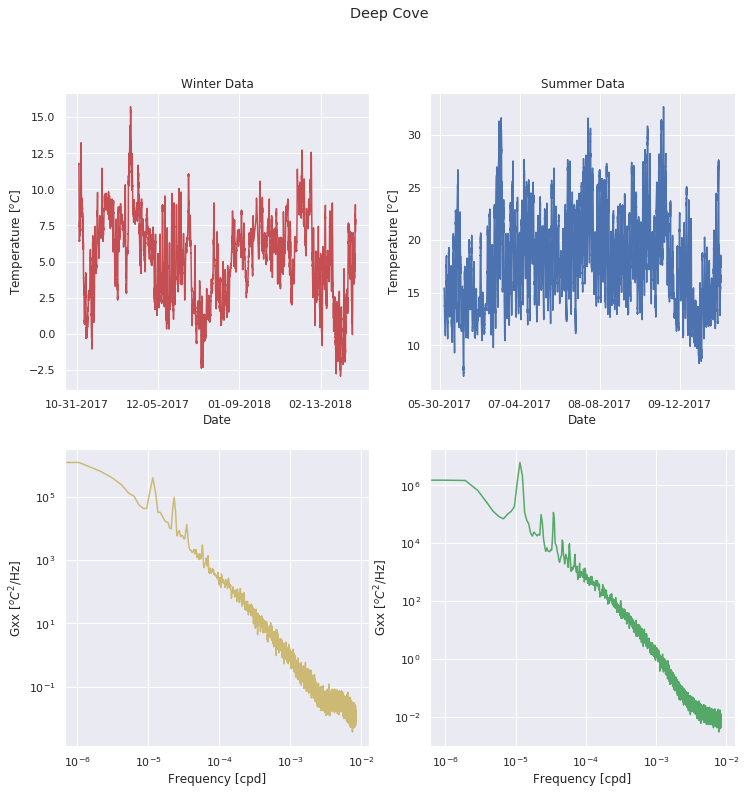

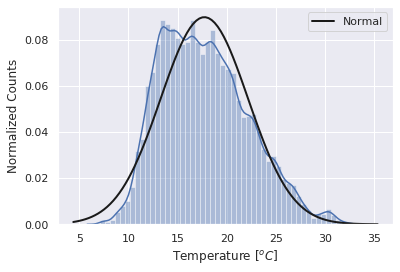

The mean of this station is in winter: 4.952059820841135
The standard deviation of this station is in winter: 2.885451584012621
The mean of this station is in summer: 17.717777892561987
The standard deviation of this station is in summer: 4.445167107713546


<Figure size 432x288 with 0 Axes>

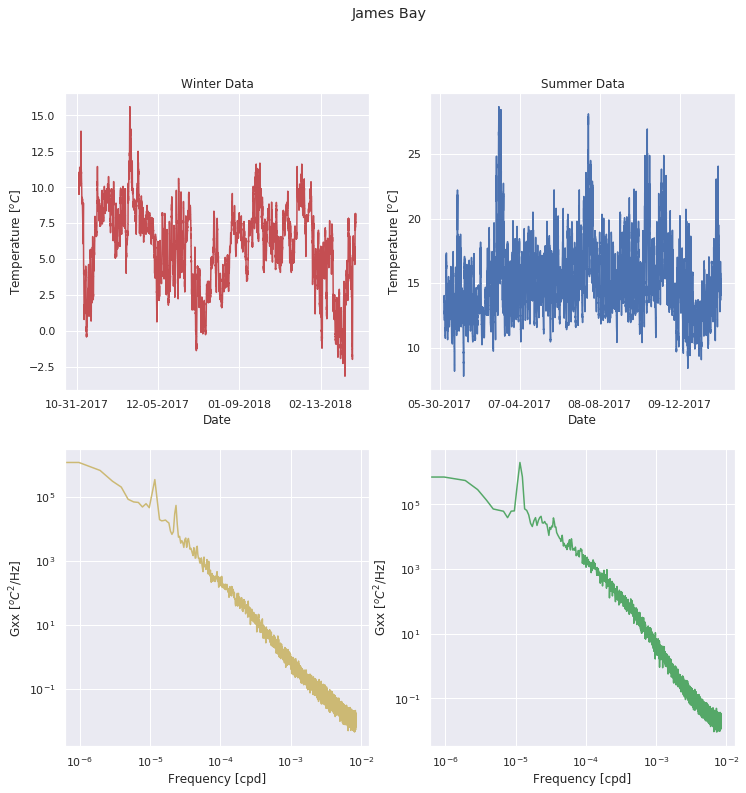

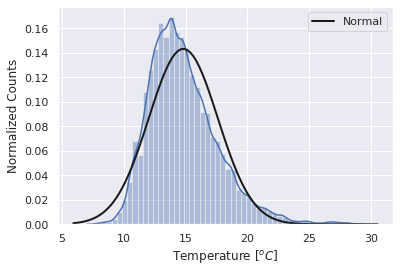

The mean of this station is in winter: 5.922285490782145
The standard deviation of this station is in winter: 2.831422061309668
The mean of this station is in summer: 14.815811615999264
The standard deviation of this station is in summer: 2.7826102499319494


<Figure size 432x288 with 0 Axes>

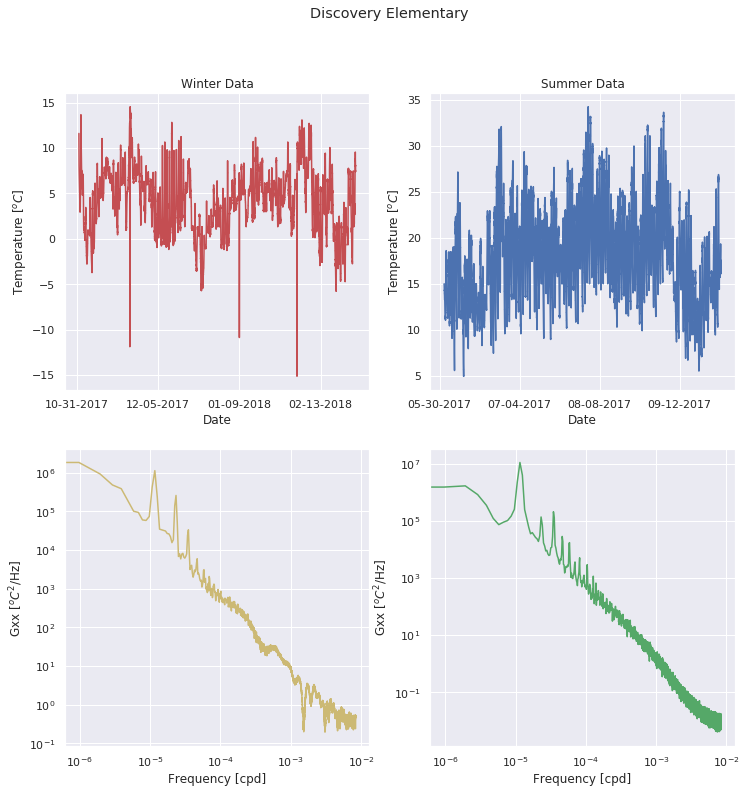

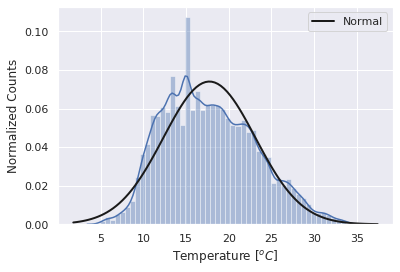

The mean of this station is in winter: 4.02357631405258
The standard deviation of this station is in winter: 3.40151177871487
The mean of this station is in summer: 17.727243198557904
The standard deviation of this station is in summer: 5.390311750016018


<Figure size 432x288 with 0 Axes>

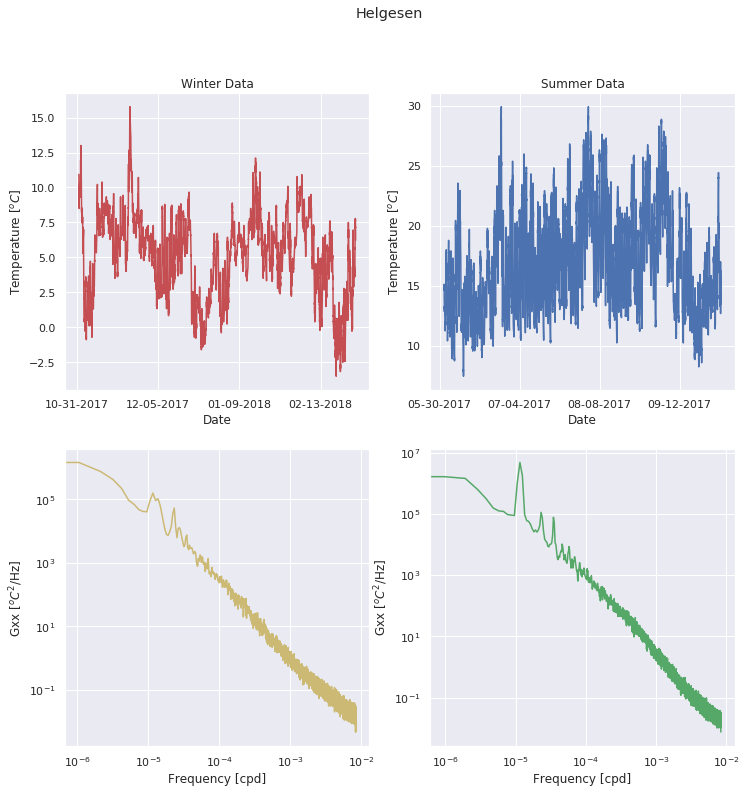

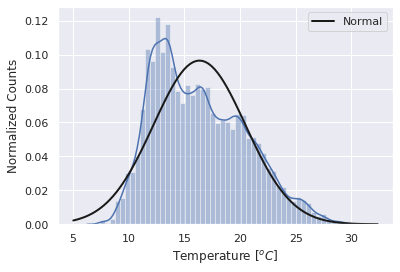

The mean of this station is in winter: 5.068895748910468
The standard deviation of this station is in winter: 2.9398128905248364
The mean of this station is in summer: 16.35358006198347
The standard deviation of this station is in summer: 4.134186697301781


<Figure size 432x288 with 0 Axes>

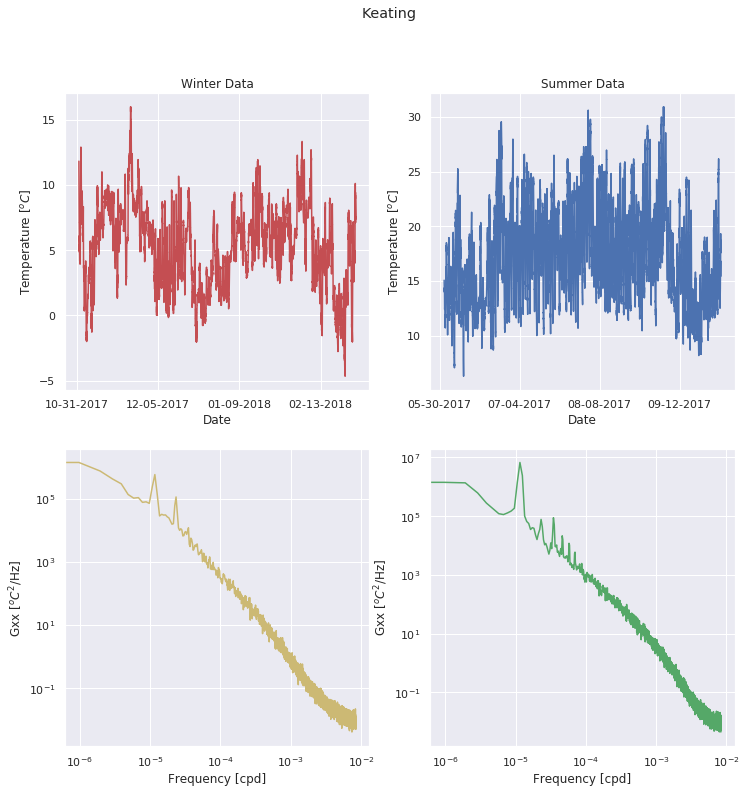

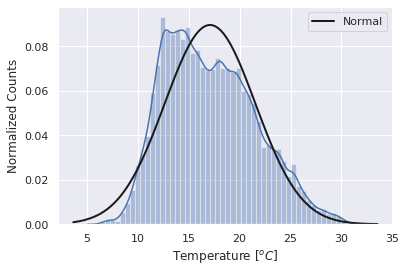

The mean of this station is in winter: 5.192228554025641
The standard deviation of this station is in winter: 3.046518295035356
The mean of this station is in summer: 17.093637532354986
The standard deviation of this station is in summer: 4.448860671137771


<Figure size 432x288 with 0 Axes>

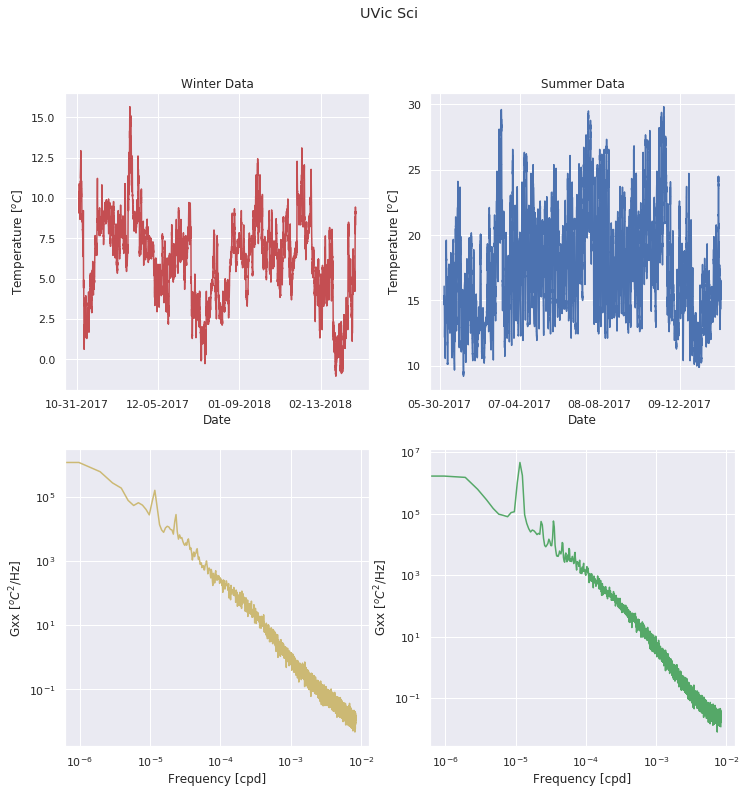

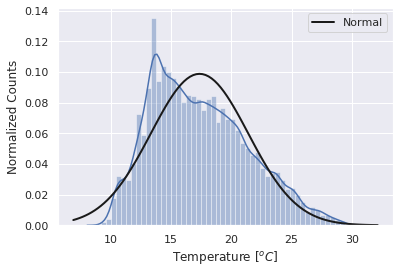

The mean of this station is in winter: 6.041953437571183
The standard deviation of this station is in winter: 2.622041858624192
The mean of this station is in summer: 17.366704089539393
The standard deviation of this station is in summer: 4.034445964317465


<Figure size 432x288 with 0 Axes>

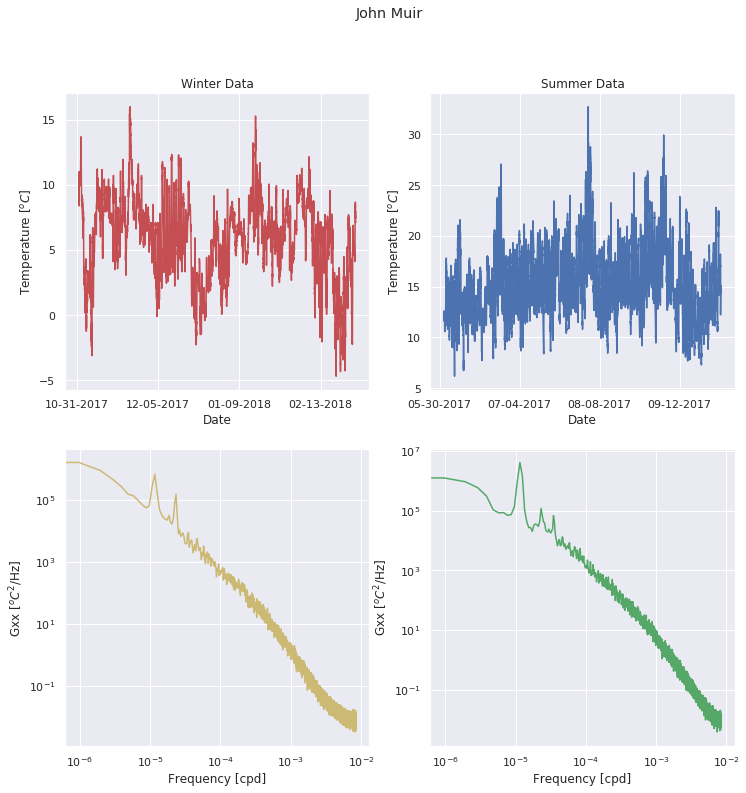

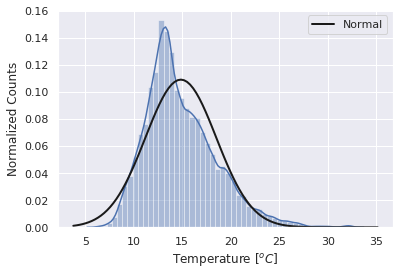

The mean of this station is in winter: 5.757478680188211
The standard deviation of this station is in winter: 3.1051042457394336
The mean of this station is in summer: 14.85088545911632
The standard deviation of this station is in summer: 3.653771397383146


<Figure size 432x288 with 0 Axes>

In [6]:
basics(winterdc,summerdc,"Deep Cove")
basics(winterjb,summerjb,"James Bay")
basics(winterde,summerde,"Discovery Elementary")
basics(winterhe,summerhe,"Helgesen")
basics(winterke,summerke,"Keating")
basics(winterus,summerus,"UVic Sci")
basics(winterjm,summerjm,"John Muir")

<Figure size 864x864 with 0 Axes>

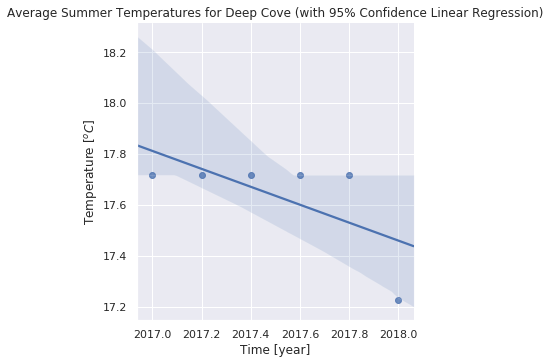

<Figure size 864x864 with 0 Axes>

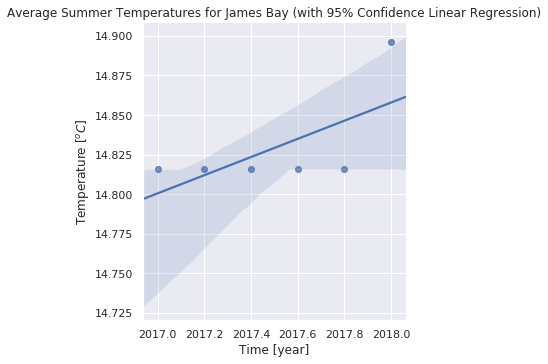

<Figure size 864x864 with 0 Axes>

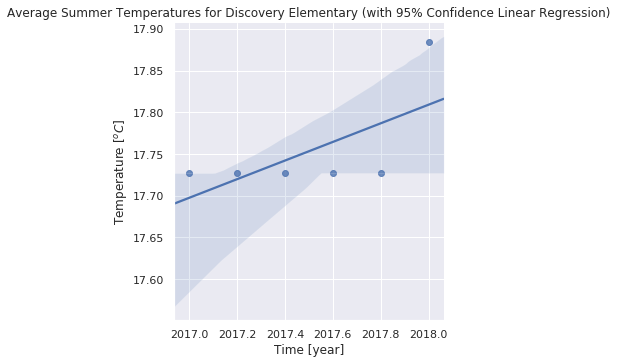

<Figure size 864x864 with 0 Axes>

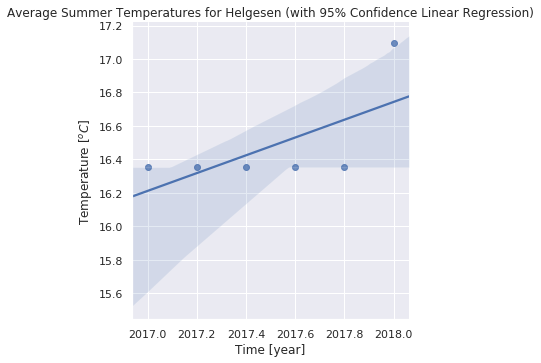

<Figure size 864x864 with 0 Axes>

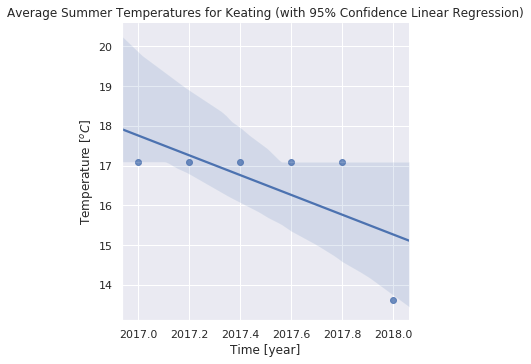

<Figure size 864x864 with 0 Axes>

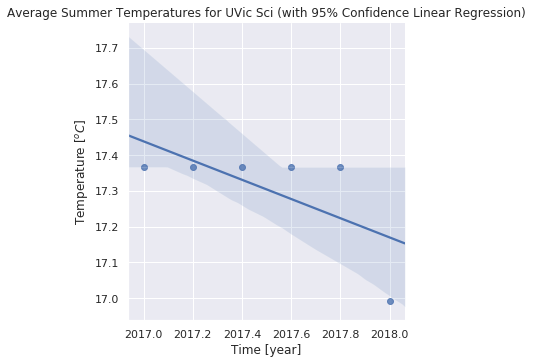

<Figure size 864x864 with 0 Axes>

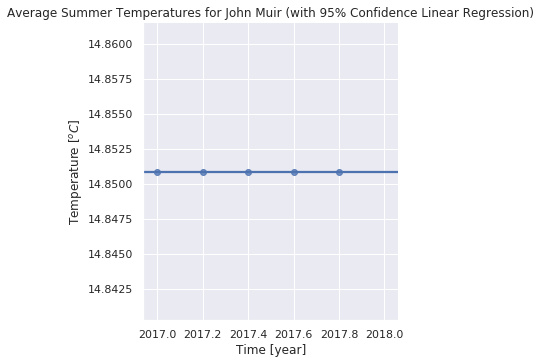

In [7]:
fig = plt.figure(figsize=(12,12))
years = np.linspace(2017, 2018, 6)
tempsummerdc = [searchDate(dc, pd.Timestamp(int(year),6,1), pd.Timestamp(int(year),9, 30)).mean(numeric_only=True).to_numpy()[0] for year in years]
avgsummerdc = pd.DataFrame({'Time [year]': years, 'Temperature [$^oC$]': tempsummerdc})
sn.lmplot(data=avgsummerdc,x='Time [year]', y='Temperature [$^oC$]', ci=95)
plt.title("Average Summer Temperatures for Deep Cove (with 95% Confidence Linear Regression)")
plt.savefig("Average Summer Temperatures for Deep Cove (with 95% Confidence Linear Regression)")

fig = plt.figure(figsize=(12,12))
years = np.linspace(2017, 2018, 6)
tempsummerjb = [searchDate(jb, pd.Timestamp(int(year),6,1), pd.Timestamp(int(year),9, 30)).mean(numeric_only=True).to_numpy()[0] for year in years]
avgsummerjb = pd.DataFrame({'Time [year]': years, 'Temperature [$^oC$]': tempsummerjb})
sn.lmplot(data=avgsummerjb,x='Time [year]', y='Temperature [$^oC$]', ci=95)
plt.title("Average Summer Temperatures for James Bay (with 95% Confidence Linear Regression)")
plt.savefig("Average Summer Temperatures for James Bay (with 95% Confidence Linear Regression)")

fig = plt.figure(figsize=(12,12))
years = np.linspace(2017, 2018, 6)
tempsummerde = [searchDate(de, pd.Timestamp(int(year),6,1), pd.Timestamp(int(year),9, 30)).mean(numeric_only=True).to_numpy()[0] for year in years]
avgsummerde = pd.DataFrame({'Time [year]': years, 'Temperature [$^oC$]': tempsummerde})
sn.lmplot(data=avgsummerde,x='Time [year]', y='Temperature [$^oC$]', ci=95)
plt.title("Average Summer Temperatures for Discovery Elementary (with 95% Confidence Linear Regression)")
plt.savefig("Average Summer Temperatures for Discovery Elementary (with 95% Confidence Linear Regression)")

fig = plt.figure(figsize=(12,12))
years = np.linspace(2017, 2018, 6)
tempsummerhe = [searchDate(he, pd.Timestamp(int(year),6,1), pd.Timestamp(int(year),9, 30)).mean(numeric_only=True).to_numpy()[0] for year in years]
avgsummerhe = pd.DataFrame({'Time [year]': years, 'Temperature [$^oC$]': tempsummerhe})
sn.lmplot(data=avgsummerhe,x='Time [year]', y='Temperature [$^oC$]', ci=95)
plt.title("Average Summer Temperatures for Helgesen (with 95% Confidence Linear Regression)")
plt.savefig("Average Summer Temperatures for Helgesen (with 95% Confidence Linear Regression)")

fig = plt.figure(figsize=(12,12))
years = np.linspace(2017, 2018, 6)
tempsummerke = [searchDate(ke, pd.Timestamp(int(year),6,1), pd.Timestamp(int(year),9, 30)).mean(numeric_only=True).to_numpy()[0] for year in years]
avgsummerke = pd.DataFrame({'Time [year]': years, 'Temperature [$^oC$]': tempsummerke})
sn.lmplot(data=avgsummerke,x='Time [year]', y='Temperature [$^oC$]', ci=95)
plt.title("Average Summer Temperatures for Keating (with 95% Confidence Linear Regression)")
plt.savefig("Average Summer Temperatures for Keating (with 95% Confidence Linear Regression)")

fig = plt.figure(figsize=(12,12))
years = np.linspace(2017, 2018, 6)
tempsummerus = [searchDate(us, pd.Timestamp(int(year),6,1), pd.Timestamp(int(year),9, 30)).mean(numeric_only=True).to_numpy()[0] for year in years]
avgsummerus = pd.DataFrame({'Time [year]': years, 'Temperature [$^oC$]': tempsummerus})
sn.lmplot(data=avgsummerus,x='Time [year]', y='Temperature [$^oC$]', ci=95)
plt.title("Average Summer Temperatures for UVic Sci (with 95% Confidence Linear Regression)")
plt.savefig("Average Summer Temperatures for UVic Sci (with 95% Confidence Linear Regression)")

fig = plt.figure(figsize=(12,12))
years = np.linspace(2017, 2018, 6)
tempsummerjm = [searchDate(jm, pd.Timestamp(int(year),6,1), pd.Timestamp(int(year),9, 30)).mean(numeric_only=True).to_numpy()[0] for year in years]
avgsummerjm = pd.DataFrame({'Time [year]': years, 'Temperature [$^oC$]': tempsummerjm})
sn.lmplot(data=avgsummerjm,x='Time [year]', y='Temperature [$^oC$]', ci=95)
plt.title("Average Summer Temperatures for John Muir (with 95% Confidence Linear Regression)")
plt.savefig("Average Summer Temperatures for John Muir (with 95% Confidence Linear Regression)")

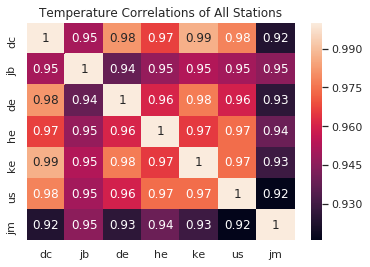

<Figure size 432x288 with 0 Axes>

In [8]:
corrdf = pd.DataFrame({'dc': dc['temp'],'jb':jb['temp'],'de':de['temp'],'he':he['temp'],'ke':ke['temp'],'us':us['temp'],'jm':jm['temp']})
corrMatrix = corrdf.corr()

fig = plt.figure()
plt.title('Temperature Correlations of All Stations')
sn.heatmap(corrMatrix,annot=True)
plt.show()
plt.savefig("Temperature Correlations of All Stations")

def corrLate(summer,winter):
    corrMatrixx = summer.corr()
    corrMatrixxx = winter.corr()
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(121)
    sn.heatmap(corrMatrixx,annot=True)
    ax1.title.set_text("Summer Temperature Correlations of All Stations")
    ax2 = fig.add_subplot(122)
    sn.heatmap(corrMatrixxx,annot=True)
    ax2.title.set_text("Winter Temperature Correlations of All Stations")
    fig.tight_layout()
    plt.show()

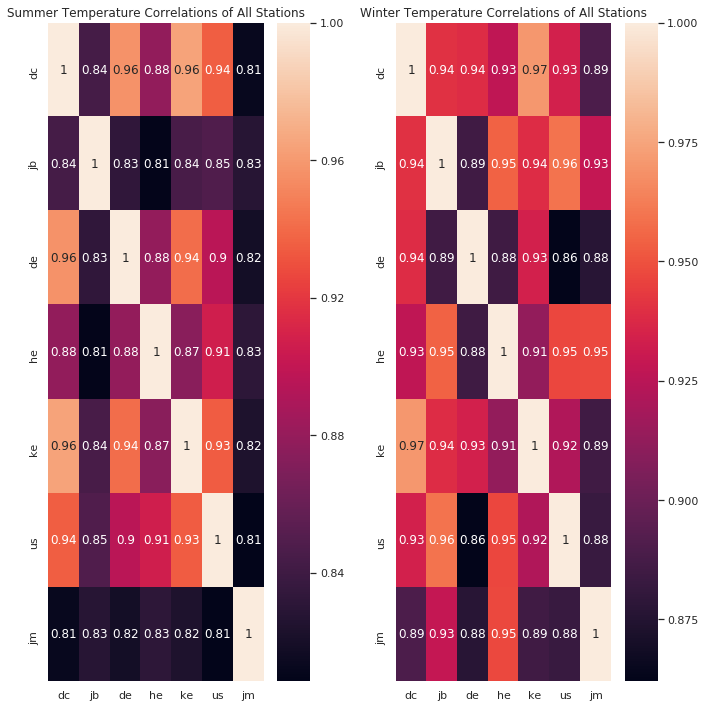

In [9]:
#Add rest of stations
summerdff = pd.DataFrame({'dc':summerdc['temp'],'jb':summerjb['temp'],'de':summerde['temp'],'he':summerhe['temp'],'ke':summerke['temp'],'us':summerus['temp'],'jm':summerjm['temp']})
winterdff = pd.DataFrame({'dc':winterdc['temp'],'jb':winterjb['temp'],'de':winterde['temp'],'he':winterhe['temp'],'ke':winterke['temp'],'us':winterus['temp'],'jm':winterjm['temp']})

corrLate(summerdff, winterdff)

In [10]:
def readHourData(filename):
    long, lat, rest = [], [], []
    with open(filename, 'r') as hours:
        long, lat = map(lambda x: [float(i) for i in x.split()[1:]], itertools.islice(hours, 0, 2))
        rest = [i for i in map(lambda x: [float(i) for i in x.split()], itertools.islice(hours, 0, None))]
    long_lat = pd.DataFrame({'lon': long, "lat": lat})
    df = pd.DataFrame(rest)
    df.columns = ['time' if x==0 else x for x in df.columns]
    df['time'] = df['time'].apply(lambda time: datetime.fromordinal(int(time)) + timedelta(days=time%1)-timedelta(days=366))
    return df.dropna(), long_lat

In [11]:
hourdata, longlat = readHourData('AllStations_temperature_h_2019.dat')

In [12]:
longlat

,lon,lat
0,236.554,48.5745
1,236.499,48.5376
2,236.679,48.4655
3,236.607,48.4608
4,236.514,48.4356
5,236.630,48.5273
6,236.523,48.4529
7,236.543,48.6804
8,236.662,48.4562
9,236.304,48.3891


In [13]:
hourdata

,time,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
30466,2011-06-23 10:00:02.879995,14.59,13.51,14.51,14.06,14.20,15.57,13.75,15.34,14.47,...,14.33,13.52,14.74,14.18,15.12,15.85,13.74,14.42,14.07,13.79
30467,2011-06-23 10:59:57.120005,14.51,13.86,14.95,14.67,15.35,15.73,14.91,15.96,15.06,...,15.47,14.34,15.70,14.07,15.35,15.87,14.74,15.37,15.08,15.01
30468,2011-06-23 12:00:00.000000,15.61,16.11,16.41,16.12,16.17,16.86,15.95,16.85,16.62,...,16.90,16.16,17.06,15.66,17.07,16.78,15.75,16.58,16.38,16.35
30469,2011-06-23 13:00:02.879995,16.56,16.88,17.62,16.70,16.48,18.16,16.45,17.32,17.31,...,17.84,16.37,16.99,16.05,18.03,17.69,16.78,17.36,17.04,16.41
30470,2011-06-23 13:59:57.120005,17.70,16.71,18.02,16.91,16.80,18.76,16.61,18.76,18.05,...,18.53,16.71,17.40,16.17,17.91,18.48,17.35,18.22,17.93,16.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88548,2018-02-06 12:00:00.000000,8.78,8.03,8.61,8.21,8.10,8.70,8.18,8.25,8.22,...,8.40,7.87,8.35,7.88,8.72,8.20,8.02,8.31,8.51,8.87
88549,2018-02-06 13:00:02.879995,7.91,7.93,8.63,8.27,8.22,8.73,8.26,8.57,8.39,...,8.61,8.15,8.39,7.72,8.69,8.69,8.07,8.11,8.30,8.82
88550,2018-02-06 13:59:57.120005,8.38,7.84,8.21,8.17,8.01,8.41,7.78,8.30,7.97,...,8.40,7.57,8.16,7.50,8.48,8.76,7.64,7.73,8.05,8.58
88551,2018-02-06 15:00:00.000000,8.19,7.66,8.00,7.95,7.74,8.06,7.48,8.26,7.84,...,8.33,7.08,7.99,7.19,8.32,8.63,7.46,7.60,7.88,8.55


In [14]:
def readCoastLine(filename):
    long, lat = [], []
    with open(filename, 'r') as coast:
        for i in map(lambda x: [float(i) for i in x.split()], itertools.islice(coast, 0, None)):
            long.append(i[0])
            lat.append(i[1])    
    df = pd.DataFrame({'long': long, 'lat': lat})
    return df

In [15]:
cl = readCoastLine('Coast.dat')

In [16]:
cl

,long,lat
0,-123.8217,48.9999
1,-123.8220,48.9996
2,-123.8158,48.9996
3,-123.8143,48.9978
4,-123.8126,48.9978
...,...,...
2415,-123.9918,48.4052
2416,-123.9933,48.4052
2417,-123.9944,48.4061
2418,-123.9959,48.4061


In [17]:
summer_start = pd.Timestamp(2015,6,1)
summer_end = pd.Timestamp(2015, 9,30)
winter_start = pd.Timestamp(2016, 11, 30)
winter_end = pd.Timestamp(2017, 2, 28)

summer_hour = searchDate(hourdata, summer_start, summer_end)
winter_hour = searchDate(hourdata, winter_start, winter_end)


def interpolateMap(data, name):
    plt.figure(figsize=(12,12))
    plt.title(name)
    coast_lon = cl['long']*np.cos(48.6*np.pi/180)
    coast_lat = cl['lat']
    lon = (longlat['lon']-360)*np.cos(48.6*np.pi/180)
    lat = longlat['lat']
    plt.plot(coast_lon,coast_lat,c='k')
    plt.fill(coast_lon,coast_lat,zorder=0)
    xi = np.linspace(np.min(coast_lon),np.max(coast_lon),1000)
    yi = np.linspace(np.min(coast_lat),np.max(coast_lat),1000)
    xi, yi = np.meshgrid(xi,yi)
    zi = griddata((lon,lat),data.mean(),(xi,yi),method='cubic')
    plt.contourf(xi,yi,zi,15,alpha=0.6,cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label(r'Temperature [$^oC$]')
    plt.scatter(lon, lat, marker='X', s=100 ,c='gold')
    plt.scatter(lon, lat, marker='X', s=25, c='r')
    plt.xlim([-81.85,-81.5])
    plt.ylim([48.35,48.7])
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f"{name}.png")

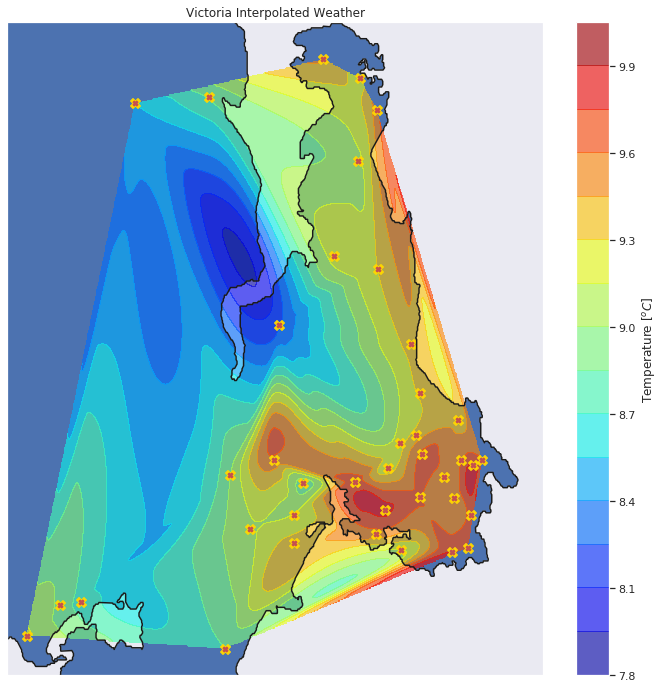

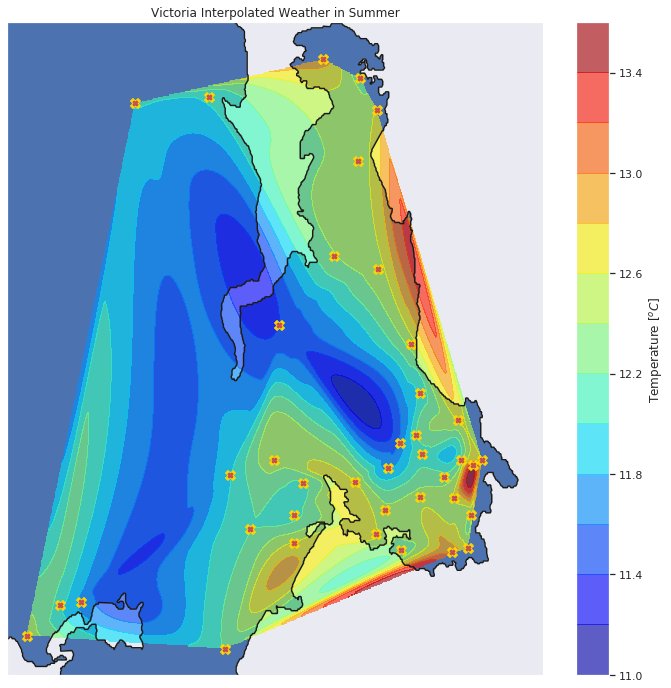

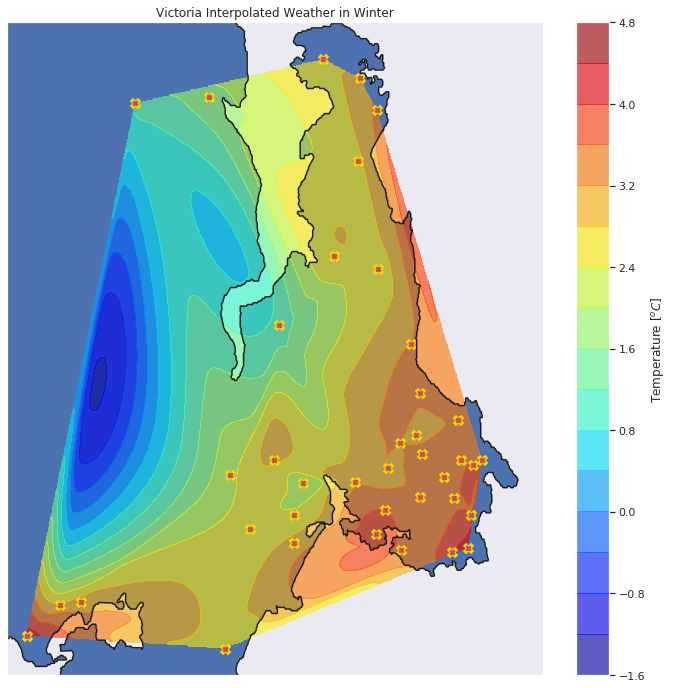

In [18]:
interpolateMap(hourdata,"Victoria Interpolated Weather")
interpolateMap(summer_hour,"Victoria Interpolated Weather in Summer")
interpolateMap(winter_hour,"Victoria Interpolated Weather in Winter")

In [19]:
pip install eofs

Note: you may need to restart the kernel to use updated packages.


In [20]:
from eofs.standard import Eof

In [24]:
def eofAnalysis(data):
    coast_lon = cl['long']*np.cos(48.6*np.pi/180)
    coast_lat = cl['lat']
    lon = (longlat['lon']-360)*np.cos(48.6*np.pi/180)
    lat = longlat['lat']
    ndf = data.drop(['time'],axis=1).to_numpy()
    xi = np.linspace(np.min(coast_lon), np.max(coast_lon), 100)
    yi = np.linspace(np.min(coast_lat), np.max(coast_lat), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi_all = []
    for dat in ndf:
        zi_all.append(griddata((lon, lat), dat, (xi, yi), method='cubic'))
    solver = Eof(np.array(zi_all,dtype='float')) #Assumes for each value of a griddata, is a new time point
    eof1 = solver.eofsAsCorrelation(neofs=3) #Returns first correlation function
    pc1 = solver.pcs(npcs=3, pcscaling=1)
    variance_fractions = solver.varianceFraction()
    date_form= mdates.DateFormatter('%m-%d')
    fig,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,12))
    ax1.set_title('EOF 1')
    # Plot the coastline
    ax1.plot(coast_lon, coast_lat, c='k')
    ax1.fill(coast_lon, coast_lat, zorder=0)
    fill = ax1.contourf(xi, yi, eof1[0].squeeze(),  cmap=plt.cm.RdBu_r)
    cbar = fig.colorbar(fill, ax=ax1)
    cbar.set_label(r'Correlation Coefficient')
    ax1.scatter(lon, lat, marker='X', s=100 ,c='gold')
    ax1.scatter(lon, lat, marker='X', s=25, c='r')
    ax1.set_xlim([-81.85, -81.5])
    ax1.set_ylim([48.35, 48.7])
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    ax2.set_title('EOF 2')
    # Plot the coastline
    ax2.plot(coast_lon, coast_lat, c='k')
    ax2.fill(coast_lon, coast_lat, zorder=0)
    fill = ax2.contourf(xi, yi, eof1[1].squeeze(),  cmap=plt.cm.RdBu_r)
    cbar = fig.colorbar(fill, ax=ax2)
    cbar.set_label(r'Correlation Coefficient')
    ax2.scatter(lon, lat, marker='X', s=100 ,c='gold')
    ax2.scatter(lon, lat, marker='X', s=25, c='r')
    ax2.set_xlim([-81.85, -81.5])
    ax2.set_ylim([48.35, 48.7])
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    ax3.set_title('EOF 3')
    # Plot the coastline
    ax3.plot(coast_lon, coast_lat, c='k')
    ax3.fill(coast_lon, coast_lat, zorder=0)
    fill = ax3.contourf(xi, yi, eof1[2].squeeze(),  cmap=plt.cm.RdBu_r)
    cbar = fig.colorbar(fill, ax=ax3)
    cbar.set_label(r'Correlation Coefficient')
    ax3.scatter(lon, lat, marker='X', s=100 ,c='gold')
    ax3.scatter(lon, lat, marker='X', s=25, c='r')
    ax3.set_xlim([-81.85, -81.5])
    ax3.set_ylim([48.35, 48.7])
    ax3.set_xticks([])
    ax3.set_yticks([])
    
    
    # Formatter
    date_form= mdates.DateFormatter('%m-%d-%Y')

    ax4.set_title('1st Principle Component Time Series')
    ax4.plot(data['time'], pc1[:, 0], color='b', linewidth=2)
    ax4.axhline(0, color='k')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Amplitude')
    ax4.xaxis.set_major_formatter(date_form)
    ax4.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax4.xaxis.set_minor_locator(mdates.DayLocator())
    
    ax5.set_title('2nd Principle Component Time Series')
    ax5.plot(data['time'], pc1[:, 1], color='b', linewidth=2)
    ax5.axhline(0, color='k')
    ax5.set_xlabel('Year')
    ax5.set_ylabel('Amplitude')
    ax5.xaxis.set_major_formatter(date_form)
    ax5.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax5.xaxis.set_minor_locator(mdates.DayLocator())
    
    ax6.set_title('3rd Principle Component Time Series')
    ax6.plot(data['time'], pc1[:, 2], color='b', linewidth=2)
    ax6.axhline(0, color='k')
    ax6.set_xlabel('Year')
    ax6.set_ylabel('Amplitude')
    ax6.xaxis.set_major_formatter(date_form)
    ax6.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax6.xaxis.set_minor_locator(mdates.DayLocator()) #Mini ticks
    
    fig.tight_layout()
    return pd.DataFrame({'Principle Component': [i+1 for i in range(len(variance_fractions))],'variance': variance_fractions})

,Principle Component,variance
0,1,9.451884e-01
1,2,2.990814e-02
2,3,8.175498e-03
3,4,3.507117e-03
4,5,2.844666e-03
...,...,...
153,154,8.200343e-33
154,155,8.200343e-33
155,156,8.200343e-33
156,157,8.200343e-33


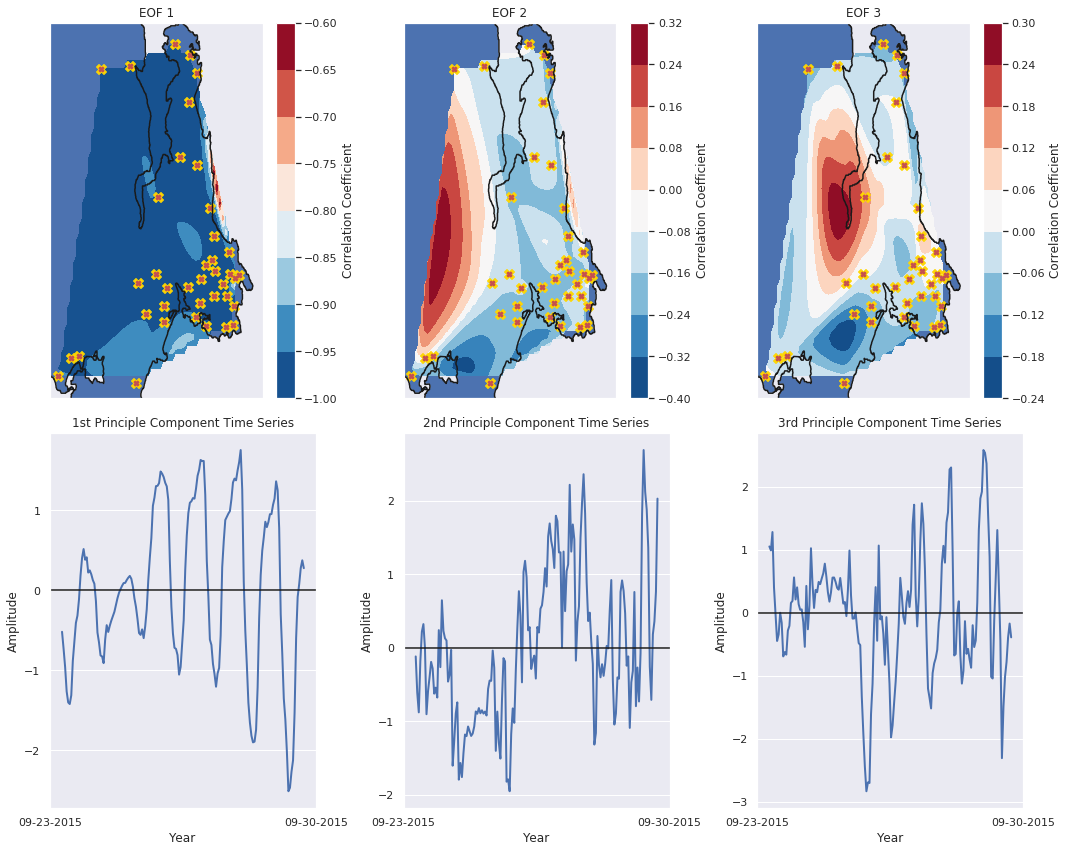

In [25]:
eofAnalysis(summer_hour)

,Principle Component,variance
0,1,8.985962e-01
1,2,5.542828e-02
2,3,1.364536e-02
3,4,1.006941e-02
4,5,4.757894e-03
...,...,...
1152,1153,8.924863e-33
1153,1154,8.924863e-33
1154,1155,3.766872e-33
1155,1156,3.620488e-33


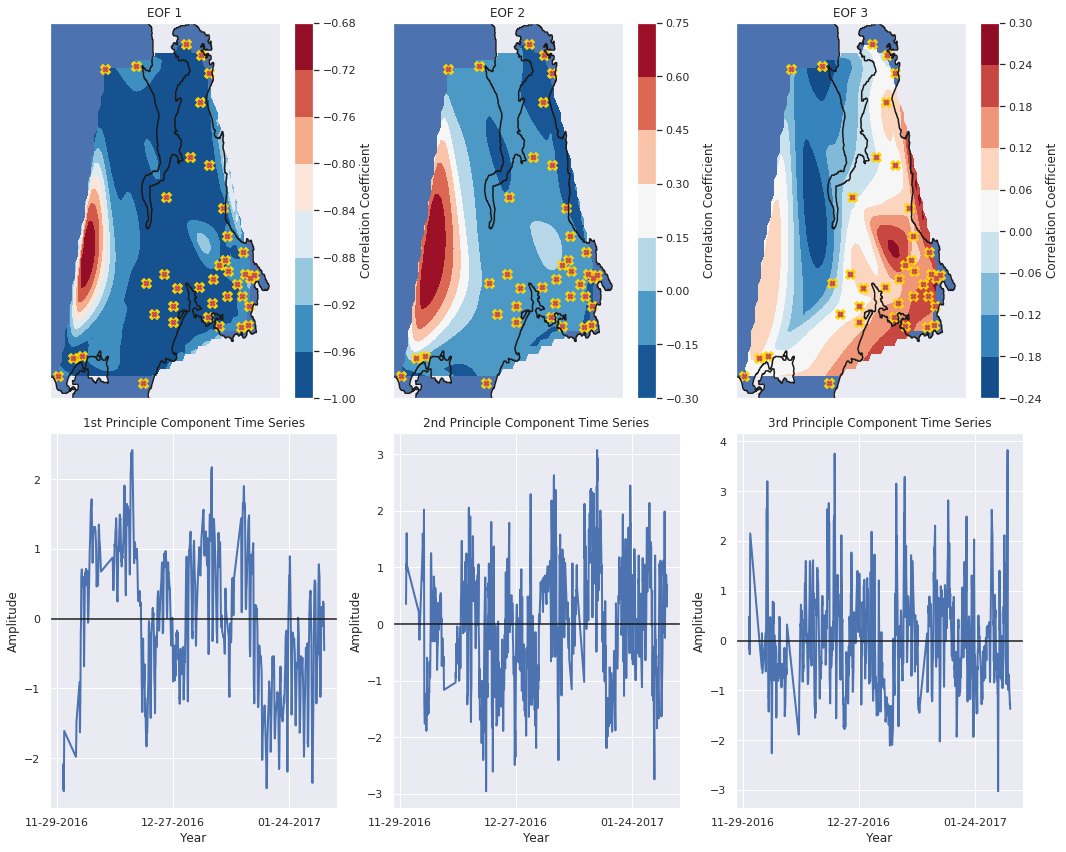

In [26]:
eofAnalysis(winter_hour)